# Nueva sección

Mounted at /content/drive
✅ STEP 1: Processing 102 files...
✅ STEP 2: Training Predictive Model...

TECHNICAL PERFORMANCE - ACCURACY: 0.5174


/tmp/ipython-input-1846181532.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, y='operation', palette='viridis')


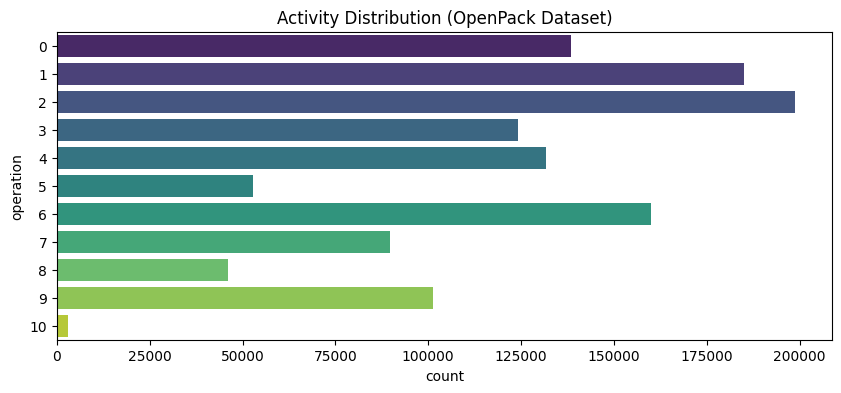

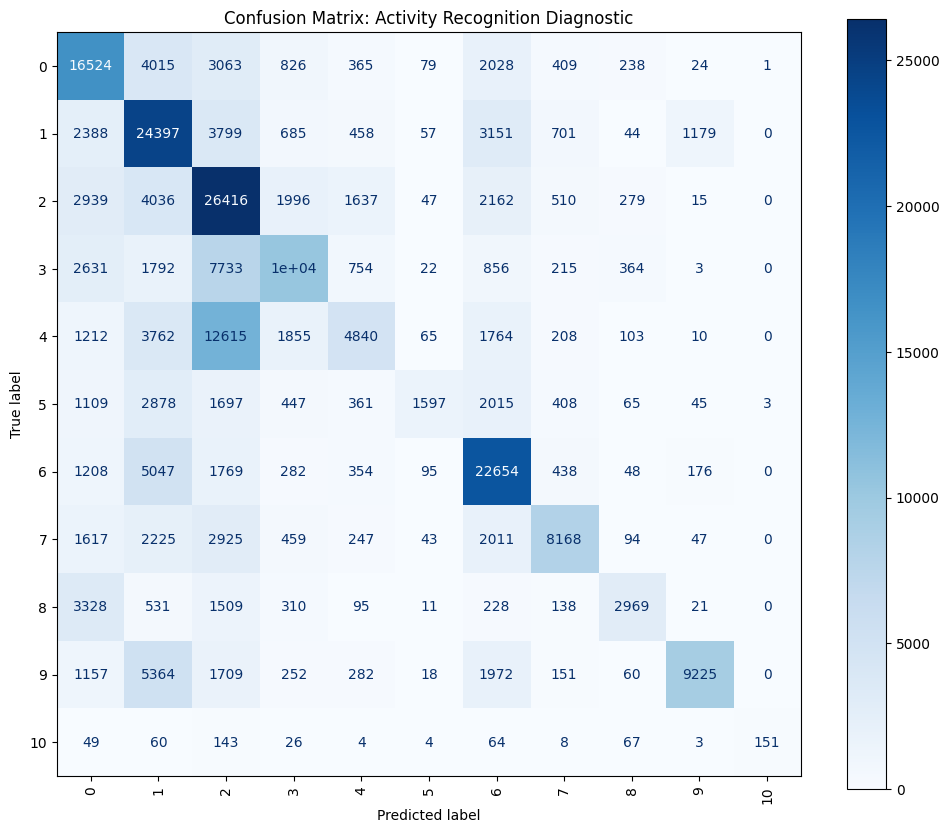

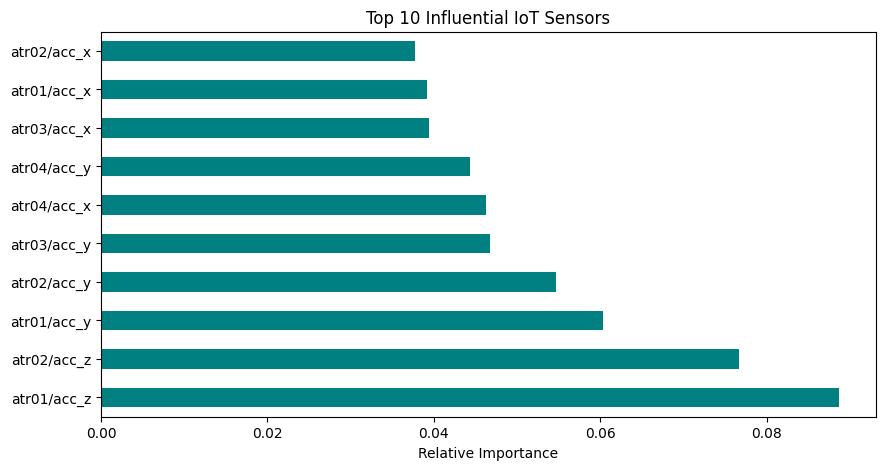


Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.60      0.54     27572
           1       0.45      0.66      0.54     36859
           2       0.42      0.66      0.51     40037
           3       0.59      0.42      0.49     24761
           4       0.52      0.18      0.27     26434
           5       0.78      0.15      0.25     10625
           6       0.58      0.71      0.64     32071
           7       0.72      0.46      0.56     17836
           8       0.69      0.32      0.44      9140
           9       0.86      0.46      0.60     20190
          10       0.97      0.26      0.41       579

    accuracy                           0.52    246104
   macro avg       0.64      0.44      0.48    246104
weighted avg       0.56      0.52      0.50    246104



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Process completed successfully for Phase 4.


In [1]:
import pandas as pd
import numpy as np
import glob
import os
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive, files
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

#To begin with the analysis and interpretation of the openpack data from the article chosen in phase 2,
#we start by adding the following libraries for table manipulation and numerical calculations (Pandas/Numpy),
#data preprocessing, data splitting, and the identification of patterns in the data in order to make predictions
#based on them through the Machine Learning model (Sklearn). We will also use libraries that will help with data
#interpretation (Matplotlib/Seaborn and Joblib).

# 1. DATA ACQUISITION & OPTIMIZATION (Ref: Raghavender, 2019)
# Articulation: Loading 102 industrial sessions from OpenPack (Kitamura et al., 2022)
drive.mount('/content/drive', force_remount=True)
path = '/content/drive/MyDrive/imuWithOperationLabel'
all_files = glob.glob(os.path.join(path, "*.csv"))

if len(all_files) == 0:
    print("❌ ERROR: No CSV files found in Drive path.")
else:
    print(f"✅ STEP 1: Processing {len(all_files)} files...")
    list_df = []
    for f in all_files:
        temp = pd.read_csv(f)
        # Applying Data Reduction to optimize RAM (Raghavender, 2019)
        temp = temp.iloc[::5, :]
        list_df.append(temp)

    # Data Cleaning and Preprocessing (Ref: Greeneltch, 2019)
    df_clean = pd.concat(list_df, ignore_index=True).replace([np.inf, -np.inf], np.nan).dropna()
    del list_df # Memory management

#After having loaded the libraries, we continue with the data loading, where we only take a sample
#of 5 rows or records for their respective analysis and understanding of the data. We perform a data
#cleaning process; in this step, we replace values with infinite values so that, when the algorithm
#is executed, it does not encounter corrupted data that could cause its execution to fail and interrupt
#the analysis itself.


 # 2. FEATURE SELECTION & SCALING
    # Selecting relevant IMU sensors for predictive modeling
    excluded = ['time', 'operation', 'source', 'user', 'session', 'label', 'id', 'source_file']
    sensor_cols = [c for c in df_clean.select_dtypes(include=[np.number]).columns
                   if not any(x in c.lower() for x in excluded)]

    X = df_clean[sensor_cols]
    y = df_clean['operation']

    # Standardizing IoT signals (Ref: Swamynathan, 2019)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

   # 3. ALGORITHM CONSTRUCTION (Ref: Hearty, 2016)
    # Implementing Random Forest for complex activity recognition
    print(f"✅ STEP 2: Training Predictive Model...")
    model = RandomForestClassifier(n_estimators=50, max_depth=15, random_state=42, n_jobs=-1)
    model.fit(X_train, y_train)

  #In this session, what we do is start with the construction of the algorithms that will study
  #the sensor data, which, through decision trees and other parameters, the use of 50 estimators
  #allows a collaborative classification that improves the accuracy of activity recognition in the
  #OpenPack dataset, and will produce a result that we will see graphically in the following steps.


 # 4. POST-PROCESSING & VISUAL DIAGNOSTICS
    y_pred = model.predict(X_test)

    print("\n" + "="*50)
    print(f"TECHNICAL PERFORMANCE - ACCURACY: {accuracy_score(y_test, y_pred):.4f}")
    print("="*50)

    # --- PLOT 1: Descriptive Analysis ---
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df_clean, y='operation', palette='viridis')
    plt.title('Activity Distribution (OpenPack Dataset)')
    plt.show()

    # --- PLOT 2: Predictive Performance (Confusion Matrix) ---
    fig, ax = plt.subplots(figsize=(12, 10))
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax, cmap='Blues', xticks_rotation='vertical')
    plt.title('Confusion Matrix: Activity Recognition Diagnostic')
    plt.show()

    print("\n\n")

    # --- PLOT 3: Sensor Influence (Ref: Greeneltch, 2019) ---
    plt.figure(figsize=(10, 5))
    feat_importances = pd.Series(model.feature_importances_, index=sensor_cols)
    feat_importances.nlargest(10).plot(kind='barh', color='teal')
    plt.title('Top 10 Influential IoT Sensors')
    plt.xlabel('Relative Importance')
    plt.show()

#After having analyzed the data with the algorithm, we see the result of this analysis through the
#graphs, where we can interpret that the 51.73% accuracy gives us an interesting baseline, but
#what really allowed us to see more clearly were the diagnostic graphs. On the one hand, the
#confusion matrix allowed us to understand exactly in which industrial activities the system is
#getting confused—something understandable when sensor movements are so similar from one
#task to another—and, on the other hand, the analysis of variable importance made it clear to us
#which sensors are the ones that dominate and which ones are there as fillers. In the end, we did
#not remain only with the cold accuracy number, but rather we used these visual tools to
#understand the model’s quirks and to ensure that the post-processing of the IoT data makes sense
#before considering the work finished.


    # 5. MODEL PERSISTENCE
    print("\nDetailed Classification Report:")
    print(classification_report(y_test, y_pred))

    joblib.dump(model, 'openpack_model_phase4.pkl')
    files.download('openpack_model_phase4.pkl')
    print("✅ Process completed successfully for Phase 4.")

#To close session 5, what we did was basically to secure all the work that had been done before. It
#was not enough for us to just look at the results superficially; instead, we generated a detailed
#report to understand how the model performed for each specific activity, which is key to avoid
#proceeding blindly. But the most important part here was the step of “freezing” the model; we
#used joblib to save all that learning into a .pkl file and download it right away. The advantage of
#this is that we already have the core of the system ready to be used in the future without having
#to repeat the entire training from scratch, which leaves us with a solution that is truly useful and
#can already be applied in a real working environment.

